### Objective


> The objective of the current study is to examine the cereal production of Ireland in contrast to Portugal and the Rest of Europe using statistical methods and examine the factors that influence cereal production in Ireland using Machine Learning methods like Linear Regression and Decision Trees. Besides, the study seeks to examine the characteristics of the groups contained in the data using clustering.

In [109]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:60% !important; }</style>"))

In [110]:
#INSTALLATION
#!pip install researchpy
#!pip install kneed
#downgrade numpy
#!pip install numpy==1.19.5 --user
#!pip install missingno
#!pip install geopy
#!pip insall nltk
#!pip install vaderSentiment

In [111]:
#BASE
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#STATISTICS
from scipy import stats
import scipy.stats as stats
from scipy.stats import linregress
from scipy.stats import shapiro, levene, kruskal
from scipy.stats import lognorm
import statsmodels.api as sm
import missingno as msno
from sklearn.metrics import r2_score, mean_squared_error
import pymannkendall as mk
import researchpy as rp


#DATA CLEANING AND PREPROCESSING
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from geopy.geocoders import Nominatim
import plotly.express as px


#MODELLING
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

#MODEL EVALUATION
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import string
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


plt.style.use("fivethirtyeight")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##### Import data

In [112]:
#source: https://data.worldbank.org/topic/agriculture-and-rural-development
dataa = pd.read_csv('data/Agriculture & Rural Development.csv', skiprows = 4)

In [113]:
#Get data related to Ireland
irl = dataa[dataa['Country Code'] == 'IRL']
#Get data related to portugal
port = dataa[dataa['Country Code'] == 'PRT']
#Get data related to the rest of the european union
eu = dataa[dataa['Country Code'] == 'EUU']

#### Ireland

In [114]:
irl_df = irl.drop(['Country Name', 'Country Code', 'Indicator Code', 'Unnamed: 66'], axis = 1)

irl_df = irl_df.set_index('Indicator Name').T
irl_df = irl_df.reset_index(drop = True)

irl_df = irl_df.rename_axis(None, axis=1)
#drop columns with more than 20% missing information
print("Number of indicators:",len(irl_df.columns))
print("Number of indicators:",len(irl_df))
irl_df = irl_df.dropna(thresh=0.8*len(irl_df), axis=1)
print("Number of indicators after initial wrangling:",len(irl_df.columns))

irl_df.head()

Number of indicators: 42
Number of indicators: 62
Number of indicators after initial wrangling: 20


,Agricultural raw materials exports (% of merchandise exports),Agricultural raw materials imports (% of merchandise imports),Rural population (% of total population),Rural population growth (annual %),Rural population,Cereal yield (kg per hectare),Surface area (sq. km),Livestock production index (2014-2016 = 100),Food production index (2014-2016 = 100),Crop production index (2014-2016 = 100),Cereal production (metric tons),Land area (sq. km),Permanent cropland (% of land area),Land under cereal production (hectares),Arable land (% of land area),Arable land (hectares per person),Arable land (hectares),Agricultural land (% of land area),Agricultural land (sq. km),Fertilizer consumption (kilograms per hectare of arable land)
0,NaN,NaN,54.816,NaN,1550525.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,54.607,-0.530581,1542320.0,3141.5,70280.0,42.56,50.53,115.94,1367919.0,68890.0,0.043548,435435.0,5.547975,0.135321,382200.0,82.00029,56490.0,530.196232
2,NaN,NaN,54.397,0.026321,1542726.0,3330.8,70280.0,40.86,49.13,117.27,1439216.0,68890.0,0.043548,432097.0,5.547975,0.134765,382200.0,82.00029,56490.0,606.920460
3,4.733025,6.527154,54.187,0.196795,1545765.0,3125.6,70280.0,42.10,49.16,107.69,1258816.0,68890.0,0.043548,402746.0,5.547975,0.133981,382200.0,82.00029,56490.0,620.222397
4,3.598575,6.541376,53.977,0.097832,1547278.0,2929.2,70280.0,44.41,49.28,90.20,1136399.0,68890.0,0.043548,387957.0,5.547975,0.133331,382200.0,82.00029,56490.0,603.825222


#### Portugal

In [115]:
port_df = port.drop(['Country Name', 'Country Code', 'Indicator Code', 'Unnamed: 66'], axis = 1)

port_df = port_df.set_index('Indicator Name').T
port_df = port_df.reset_index(drop = True)

port_df = port_df.rename_axis(None, axis=1)
#drop columns with more than 20% missing information based on ireland variables
port_df = port_df[list(irl_df.columns)]
port_df.head()

,Agricultural raw materials exports (% of merchandise exports),Agricultural raw materials imports (% of merchandise imports),Rural population (% of total population),Rural population growth (annual %),Rural population,Cereal yield (kg per hectare),Surface area (sq. km),Livestock production index (2014-2016 = 100),Food production index (2014-2016 = 100),Crop production index (2014-2016 = 100),Cereal production (metric tons),Land area (sq. km),Permanent cropland (% of land area),Land under cereal production (hectares),Arable land (% of land area),Arable land (hectares per person),Arable land (hectares),Agricultural land (% of land area),Agricultural land (sq. km),Fertilizer consumption (kilograms per hectare of arable land)
0,NaN,NaN,65.045,NaN,5761501.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,64.656,0.205256,5773339.0,784.8,92120.0,31.56,71.38,104.50,1483275.0,91500.0,5.792350,1889916.0,27.398907,0.280761,2507000.0,42.349727,38750.0,55.114878
2,10.478162,14.862977,64.278,0.135272,5781154.0,880.6,92120.0,33.22,78.37,115.69,1764009.0,91500.0,5.901639,2003216.0,27.355191,0.278297,2503000.0,42.415301,38810.0,51.584898
3,10.102156,16.043536,63.899,-0.187803,5770307.0,828.6,92120.0,33.39,82.61,123.09,1665281.0,91500.0,6.010929,2009667.0,27.311475,0.276733,2499000.0,42.480874,38870.0,62.134054
4,9.099484,15.203926,63.517,-0.544153,5738993.0,814.3,92120.0,33.77,77.33,113.70,1537996.0,91500.0,6.120219,1888672.0,27.267760,0.276137,2495000.0,42.546448,38930.0,79.764329


#### European Union

In [116]:
#Get data excluding "Portugal" and "Ireland"
eu_countries = ["Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark", "Estonia", 
                "Finland", "France", "Germany", "Greece", "Hungary",  "Italy", "Latvia", "Lithuania", "Luxembourg",
                "Malta", "Netherlands", "Poland",  "Romania", "Slovak Republic", "Slovenia", "Spain", "Sweden"]


euro = dataa[dataa['Country Name'].isin(eu_countries)]
len(euro['Country Name'].unique())

25

In [117]:
eus = list(euro['Country Name'].unique())
eus.append("Portugal")
eus.append("Ireland")
print("Number of countries in the data:", len(eus))

Number of countries in the data: 27


In [118]:
euroo = euro.groupby('Indicator Name', axis = 0).mean()
euroo = euroo.reset_index()
euro_df = euroo.drop(['Unnamed: 66'], axis = 1)

euro_df = euro_df.set_index('Indicator Name').T
euro_df = euro_df.reset_index(drop = True)

euro_df = euro_df.rename_axis(None, axis=1)
#drop columns with more than 20% missing information based on ireland variables
euro_df = euro_df[list(irl_df.columns)]
euro_df.head()

,Agricultural raw materials exports (% of merchandise exports),Agricultural raw materials imports (% of merchandise imports),Rural population (% of total population),Rural population growth (annual %),Rural population,Cereal yield (kg per hectare),Surface area (sq. km),Livestock production index (2014-2016 = 100),Food production index (2014-2016 = 100),Crop production index (2014-2016 = 100),Cereal production (metric tons),Land area (sq. km),Permanent cropland (% of land area),Land under cereal production (hectares),Arable land (% of land area),Arable land (hectares per person),Arable land (hectares),Agricultural land (% of land area),Agricultural land (sq. km),Fertilizer consumption (kilograms per hectare of arable land)
0,NaN,NaN,44.19272,NaN,5606799.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,43.57524,-0.533887,5580041.68,2026.63750,165702.879583,69.781875,72.067500,78.774375,7.148730e+06,159837.195833,3.245694,3.675548e+06,36.269020,0.402385,6938668.75,52.244275,83195.875000,109.616873
2,8.778235,10.628363,42.93660,-0.677687,5554020.00,2161.76250,165702.879583,71.599375,72.425000,78.085625,7.695885e+06,159836.362500,3.244211,3.675717e+06,35.912262,0.397674,6918256.25,52.029476,83092.541667,118.532337
3,10.745144,8.593713,42.28300,-0.760663,5521808.72,2163.53125,165702.879583,71.441250,74.700000,82.106250,7.691221e+06,159836.779167,3.303237,3.635567e+06,35.595037,0.392886,6884531.25,51.737590,82852.208333,130.072750
4,9.902346,8.828045,41.62964,-0.755238,5489360.44,2285.84375,165702.879583,73.140625,75.329375,82.772500,8.022883e+06,159836.779167,3.324753,3.646890e+06,35.249389,0.387958,6831225.00,51.492535,82560.458333,136.859594


##### Convert NaN entries to missing

In [119]:
#Recode missing values if any
irl_df = irl_df.replace(np.nan, np.nan, regex=True)
#Portugal
port_df = port_df.replace(np.nan, np.nan, regex=True)

#Europe
euro_df = euro_df.replace(np.nan, np.nan, regex=True)

In [120]:
miss = pd.DataFrame(irl_df.isna().sum())
miss = miss.reset_index()
miss.columns = ["Indicator",'Ireland']
miss.to_csv("missing_ireland.csv", index = False)
miss

,Indicator,Ireland
0,Agricultural raw materials exports (% of merch...,4
1,Agricultural raw materials imports (% of merch...,4
2,Rural population (% of total population),0
3,Rural population growth (annual %),1
4,Rural population,0
5,Cereal yield (kg per hectare),2
6,Surface area (sq. km),2
7,Livestock production index (2014-2016 = 100),2
8,Food production index (2014-2016 = 100),2
9,Crop production index (2014-2016 = 100),2


In [121]:
irl_df.mean()

Agricultural raw materials exports (% of merchandise exports)    1.543955e+00
Agricultural raw materials imports (% of merchandise imports)    2.283943e+00
Rural population (% of total population)                         4.359702e+01
Rural population growth (annual %)                               2.578112e-01
Rural population                                                 1.586666e+06
Cereal yield (kg per hectare)                                    5.875043e+03
Surface area (sq. km)                                            7.028000e+04
Livestock production index (2014-2016 = 100)                     7.904900e+01
Food production index (2014-2016 = 100)                          8.093450e+01
Crop production index (2014-2016 = 100)                          9.624500e+01
Cereal production (metric tons)                                  1.889470e+06
Land area (sq. km)                                               6.889000e+04
Permanent cropland (% of land area)                             

In [122]:
miss = pd.DataFrame(port_df.isna().sum())
miss = miss.reset_index()
miss.columns = ["Indicator",'Portugal']
miss.to_csv("missing_portugal.csv", index = False)
miss

,Indicator,Portugal
0,Agricultural raw materials exports (% of merch...,2
1,Agricultural raw materials imports (% of merch...,2
2,Rural population (% of total population),0
3,Rural population growth (annual %),1
4,Rural population,0
5,Cereal yield (kg per hectare),2
6,Surface area (sq. km),2
7,Livestock production index (2014-2016 = 100),2
8,Food production index (2014-2016 = 100),2
9,Crop production index (2014-2016 = 100),2


In [123]:
port_df.mean()

Agricultural raw materials exports (% of merchandise exports)    5.878393e+00
Agricultural raw materials imports (% of merchandise imports)    5.271285e+00
Rural population (% of total population)                         5.051226e+01
Rural population growth (annual %)                              -8.577170e-01
Rural population                                                 4.908657e+06
Cereal yield (kg per hectare)                                    2.246525e+03
Surface area (sq. km)                                            9.213822e+04
Livestock production index (2014-2016 = 100)                     7.603550e+01
Food production index (2014-2016 = 100)                          8.770167e+01
Crop production index (2014-2016 = 100)                          9.773267e+01
Cereal production (metric tons)                                  1.410659e+06
Land area (sq. km)                                               9.151807e+04
Permanent cropland (% of land area)                             

#### Check number of missing in complete data

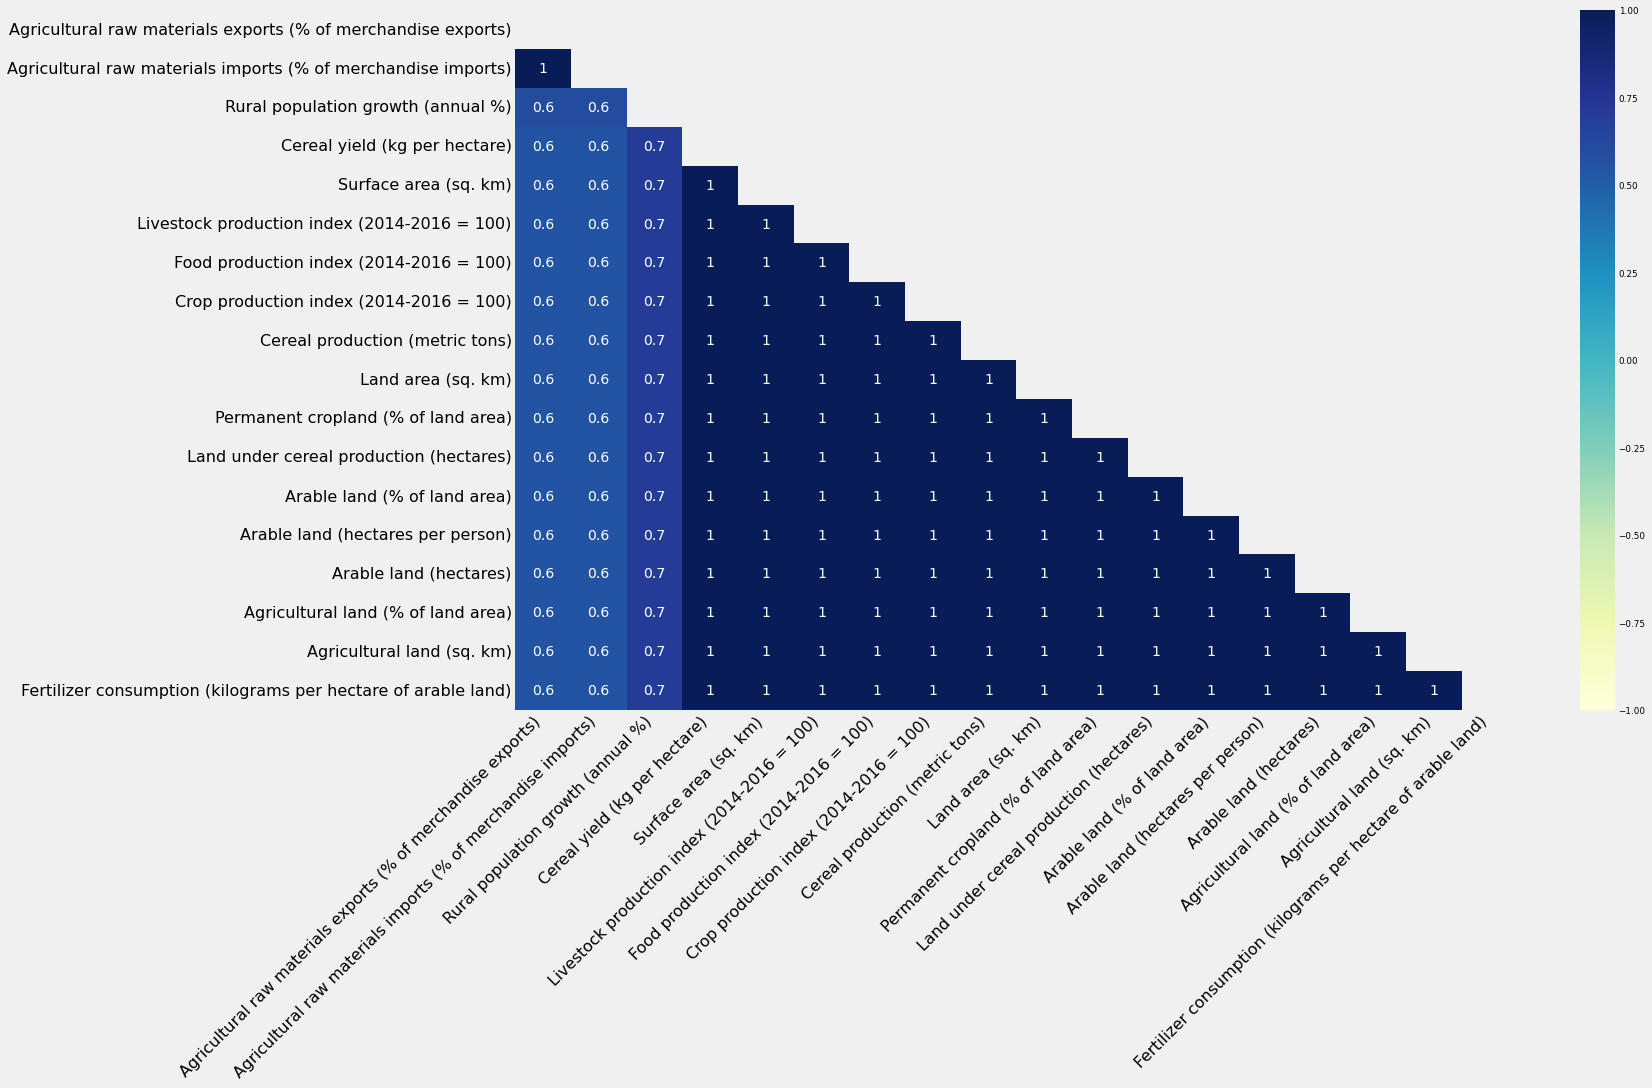

In [125]:
plt.rcParams['figure.figsize'] = 10,6
msno.heatmap(irl_df.append(euro_df).append(port_df), cmap='YlGnBu');

### Statistics for Data Analytics Tasks

#### Objective

1. Estimate the population mean (including confidence interval) of cereals production in Ireland, Portugal, and the rest of Europe.

2. Test for normality

3. Compare cereals production between Ireland, Portugal, and the rest of Europe.

4. Test for homogeneity of variance

5. Carry out non-parametric tests (Wilcoxon signed-rank test and KruskalResult) in the event that assumptions for parameteric tests are violated

6. Test for difference in means for data that meets parametric assumptions such as normality and independence

7. Test for trend in cereal production

##### Indicator information

In [126]:
ir = pd.read_csv("missing_ireland.csv")
pr = pd.read_csv("missing_portugal.csv")
#pr.merge(ir).to_csv("Missing values per indicator.csv", index = False)
pr.merge(ir)

,Indicator,Portugal,Ireland
0,Agricultural raw materials exports (% of merch...,2,4
1,Agricultural raw materials imports (% of merch...,2,4
2,Rural population (% of total population),0,0
3,Rural population growth (annual %),1,1
4,Rural population,0,0
5,Cereal yield (kg per hectare),2,2
6,Surface area (sq. km),2,2
7,Livestock production index (2014-2016 = 100),2,2
8,Food production index (2014-2016 = 100),2,2
9,Crop production index (2014-2016 = 100),2,2


In [127]:
#Drop columns with more than 30% missing
irl_df = irl_df.loc[:, irl_df.isin([' ','NULL',0]).mean() < .3]
#Fill missing
irl_df1 = irl_df.fillna(irl_df.mean())

In [128]:
#Drop columns with more than 30% missing
port_df = port_df.loc[:, port_df.isin([' ','NULL',0]).mean() < .3]
#Fill missing
port_df1 = port_df.fillna(port_df.mean())

In [129]:
#Drop columns with more than 30% missing
euro_df = euro_df.loc[:, euro_df.isin([' ','NULL',0]).mean() < .3]
#Fill missing
euro_df1 = euro_df.fillna(euro_df.mean())

In [130]:
#ireland
ireland = irl_df1['Cereal production (metric tons)']
#portugl
portugal = port_df1['Cereal production (metric tons)']
#europe
europe = euro_df1['Cereal production (metric tons)']

#### Means and Standard Deviations

In [131]:
cols = ['Livestock production index (2014-2016 = 100)', 'Food production index (2014-2016 = 100)', 'Crop production index (2014-2016 = 100)']

irl_df1[cols].agg(['mean', 'std', 'median']).T/100

,mean,std,median
Livestock production index (2014-2016 = 100),0.790490,0.194912,0.85210
Food production index (2014-2016 = 100),0.809345,0.171047,0.85905
Crop production index (2014-2016 = 100),0.962450,0.087959,0.96140


In [132]:
port_df1[cols].agg(['mean', 'std', 'median']).T

,mean,std,median
Livestock production index (2014-2016 = 100),76.035500,25.548746,82.02
Food production index (2014-2016 = 100),87.701667,10.752323,89.72
Crop production index (2014-2016 = 100),97.732667,12.018663,96.04


In [133]:
euro_df1[cols].agg(['mean', 'std', 'median']).T/100

,mean,std,median
Livestock production index (2014-2016 = 100),1.016675,0.129683,1.017826
Food production index (2014-2016 = 100),0.954870,0.087647,0.967390
Crop production index (2014-2016 = 100),0.958516,0.071026,0.958516


In [134]:
def r_squared(x, y, ax=None, **kws):
    ax = ax or plt.gca()
    slope, intercept, r_value, p_value, std_err = linregress(x=x, y=y)
    ax.annotate(f'$r^2 = {r_value ** 2:.2f}$\nEq: ${slope:.2f}x{intercept:+.2f}$',
                xy=(.05, .95), xycoords=ax.transAxes, fontsize=8,
                color='darkred', backgroundcolor='#FFFFFF99', ha='left', va='top')

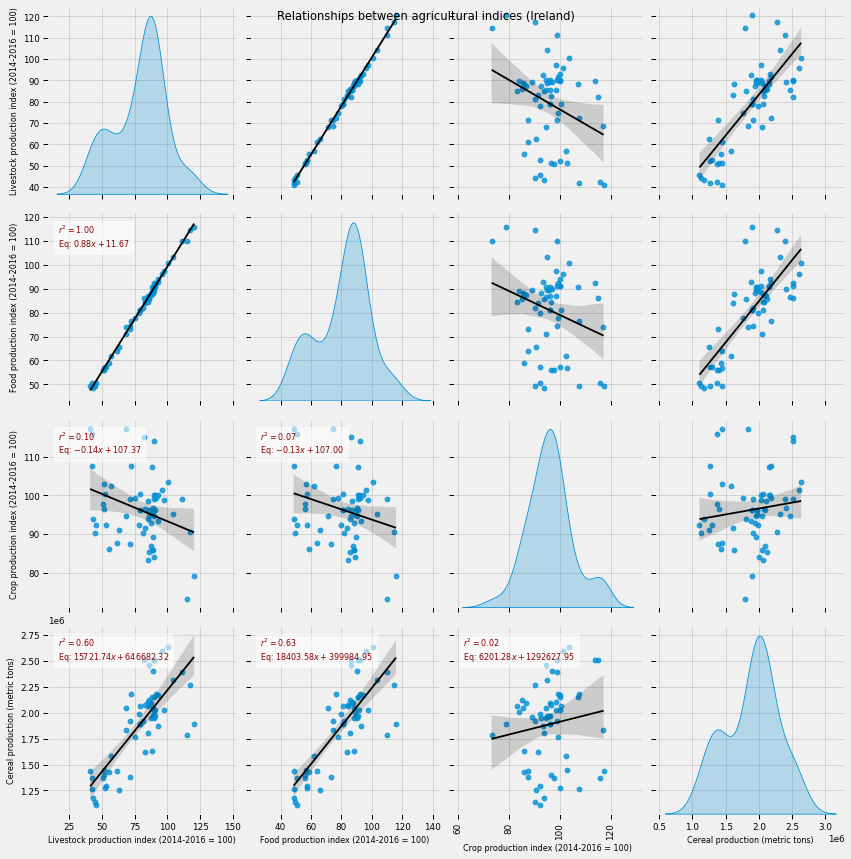

In [135]:
sns.set_context("paper", rc={"axes.labelsize":8})
g = sns.pairplot(irl_df1[cols+['Cereal production (metric tons)']], kind='reg', diag_kind='kde', height=3,
                 plot_kws={'line_kws': {'color': 'black'}})
g.map_lower(r_squared)
g.fig.suptitle("Relationships between agricultural indices (Ireland)")
plt.xticks(rotation = 90)
plt.show()

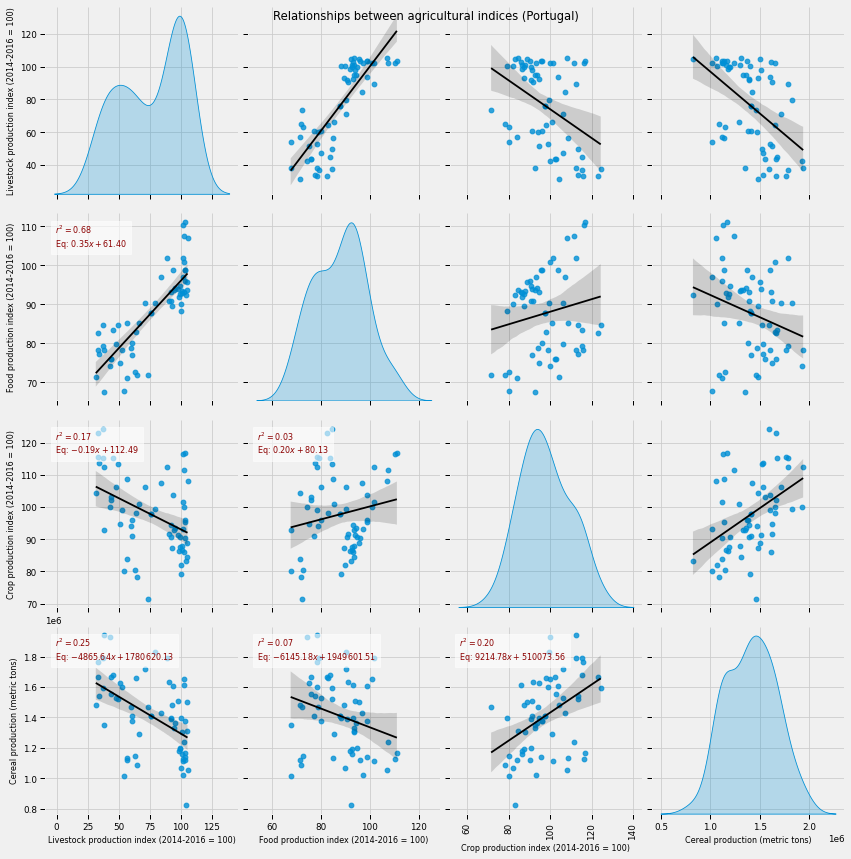

In [136]:
sns.set_context("paper", rc={"axes.labelsize":8})
g = sns.pairplot(port_df1[cols+['Cereal production (metric tons)']], kind='reg', diag_kind='kde', height=3,
                 plot_kws={'line_kws': {'color': 'black'}})
g.map_lower(r_squared)
g.fig.suptitle("Relationships between agricultural indices (Portugal)")
plt.xticks(rotation = 90)
plt.show()

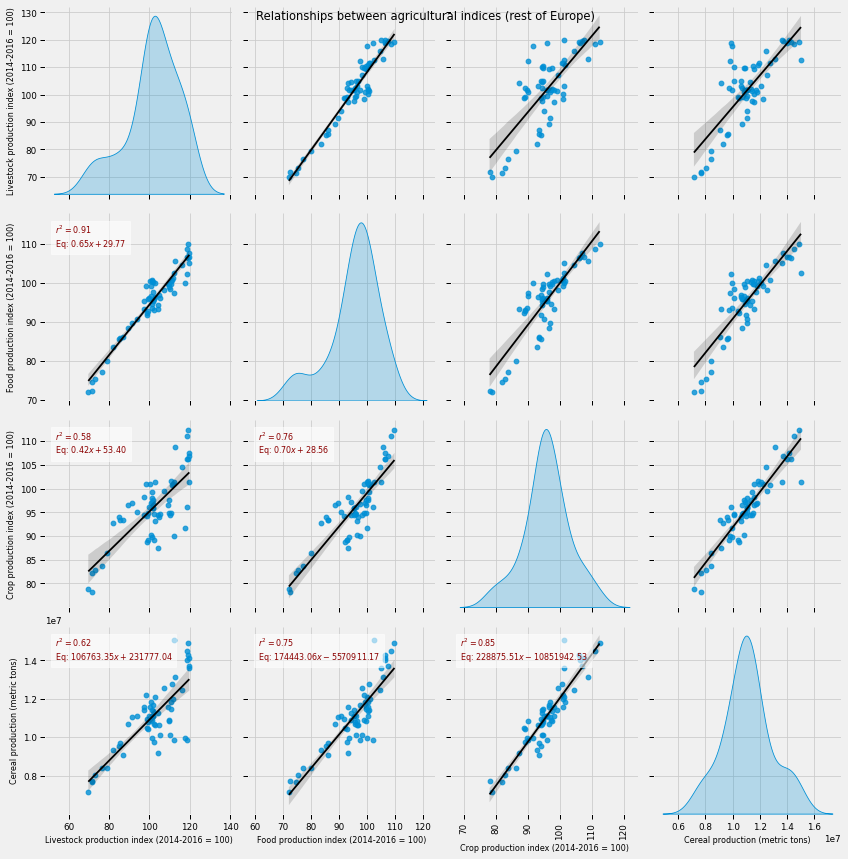

In [137]:
sns.set_context("paper", rc={"axes.labelsize":8})
g = sns.pairplot(euro_df1[cols+['Cereal production (metric tons)']], kind='reg', diag_kind='kde', height=3,
                 plot_kws={'line_kws': {'color': 'black'}})
g.map_lower(r_squared)
g.fig.suptitle("Relationships between agricultural indices (rest of Europe)")
plt.xticks(rotation = 90)
plt.show()

##### Geographical Distribution

In [219]:
prod = dataa[dataa['Indicator Name'] == 'Cereal production (metric tons)']
#Average production since 2010

prod['Average Production since 2010'] = prod.iloc[0:,54:].mean(axis = 1)
prod = prod[['Country Name', 'Average Production since 2010']]
#Get europe countries
prod = prod[prod['Country Name'].isin(eu_countries+['Portugal', 'Ireland'])]

In [220]:
#function to get longitude and latitude data from country name

geolocator = Nominatim(user_agent="Europe")
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan

In [221]:
#Get longitude and latitude of each country
lati = []
longi = []
for country in prod['Country Name']:
    location = geolocate(country)
    if location != None:
        lat = location[0]
        long = location[1]
    else:
        lat = "Not found"
        long = "Not found"
    lati.append(lat)
    longi.append(long)

In [222]:
#Add to dataframe
prod['Longitude'] = longi
prod['Latitude'] = lati

In [223]:
#create geographic plot

fig = px.scatter_geo(prod,  lat="Latitude", lon="Longitude", 
                     hover_name="Country Name", size='Average Production since 2010',
                     projection="natural earth",color = 'Country Name'
                     #projection="orthographic"
                     ,title = 'Average cereals production in Europe since 2010<br>(Mean production)',
                 width=800, height=800)
                     
fig.update_layout(
        geo_scope='europe',
    )
fig.show()

#### Confidence Interval of the Mean

In [143]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    #get the estimate and standard error
    m, se = round(np.mean(a),4), stats.sem(a)
    #confidence interval
    h = round(se * stats.t.ppf((1 + confidence) / 2., n-1),4)
    print("Upper limit:", m+h)
    print("Exact:",m)
    print("Lower limit:",m-h)
    return m, m-h, m+h
print('Ireland')
confs_ire = mean_confidence_interval(ireland, confidence=0.95)

Ireland
Upper limit: 1989922.2971
Exact: 1889469.8
Lower limit: 1789017.3029


In [144]:
print('Portugal')
confs_port = mean_confidence_interval(portugal, confidence=0.95)

Portugal
Upper limit: 1474201.8746
Exact: 1410658.6667
Lower limit: 1347115.4588


In [145]:
print('Rest of Europe')
confs_euro = mean_confidence_interval(europe, confidence=0.95)

Rest of Europe
Upper limit: 11533083.5181
Exact: 11086141.2243
Lower limit: 10639198.9305


In [146]:
#add to a dataframe
population_estimates = pd.DataFrame()
population_estimates['Region/Country'] = ['Ireland', 'Portugal', 'Rest of Europe']
population_estimates['Upper limit (00s)'] = confs_port[2]/100,confs_ire[2]/100,confs_euro[2]/100
population_estimates['Point Estimate (00s)'] = confs_port[0]/100,confs_ire[0]/100,confs_euro[0]/100
population_estimates['Lower limit (00s)'] = confs_port[1]/100,confs_ire[1]/100,confs_euro[1]/100
population_estimates.to_csv('Population estimates.csv', index = False)
population_estimates

,Region/Country,Upper limit (00s),Point Estimate (00s),Lower limit (00s)
0,Ireland,14742.018746,14106.586667,13471.154588
1,Portugal,19899.222971,18894.698000,17890.173029
2,Rest of Europe,115330.835181,110861.412243,106391.989305


##### Test for difference in cereal yields between Ireland and Portugal


###### T-test Assumptions

- Whether the two samples data groups are independent.
- Whether the data elements in respective groups follow any normal distribution.
- Whether the given two samples have similar variances. This assumption is also known as the homogeneity assumption.

##### Test for normality

In [147]:
#perform Shapiro-Wilk test for normality
shapiro(irl_df1['Cereal production (metric tons)'])

ShapiroResult(statistic=0.9561492800712585, pvalue=0.026641620323061943)

In [148]:
#perform Shapiro-Wilk test for normality
shapiro(port_df1['Cereal production (metric tons)'])

ShapiroResult(statistic=0.9818901419639587, pvalue=0.4908832311630249)

In [149]:
#perform Shapiro-Wilk test for normality
shapiro(euro_df1['Cereal production (metric tons)'])

ShapiroResult(statistic=0.9735538363456726, pvalue=0.20029352605342865)

##### Test for the assumption of homogeinity of variances

In [150]:
levene(ireland, portugal)

LeveneResult(statistic=7.697215934240209, pvalue=0.006401070928391091)

In [151]:
levene(ireland, europe)

LeveneResult(statistic=41.429171804821685, pvalue=2.5174178821087157e-09)

In [152]:
levene(europe, portugal)

LeveneResult(statistic=52.14390675951704, pvalue=4.835277480146857e-11)

>The test is significant meaning there is no homogeneity of variances and the data is not normally distributed, as such we cannot proceed with the independent samples t-test. As an alternative, we will use the Wilcoxon test to compare the mean cereal production between Ireland and Portugal.

In [153]:
len(portugal)

62

In [154]:
len(ireland)

62

In [155]:
len(europe)

62

In [156]:
summary, results = rp.ttest(group1= ireland, group1_name= "Ireland",
                            group2= portugal, group2_name= "Portugal", equal_variances = False, paired = True)
print(summary)

       sign  obs  sum ranks  expected
0  positive   45     1726.0     976.5
1  negative   17      227.0     976.5
2      zero    0        0.0       0.0
3       all   62     1953.0    1953.0


In [157]:
print(results)

  Wilcoxon signed-rank test       results
0       Mean for Ireland =   1.889470e+06
1      Mean for Portugal =   1.410659e+06
2                W value =   2.270000e+02
3                Z value =   5.254800e+00
4                p value =   0.000000e+00
5        Rank-Biserial r =   7.675000e-01
6              Pearson r =   6.674000e-01


#### Test for equality in cereal production in Portugal, Ireland, and the rest of the EU


- Since the data was noted to not follow a normal distribution, the proposed equality scenario will be tested using the Kruskal-Wallis H-test test which tests the null hypothesis that the population median of all of the groups are equal. Due to the assumption that H has a chi square distribution, the number of samples in each group must not be too small. A typical rule is that each sample must have at least 5 measurements. The sample size if 62 which is greater than 5 hence the test is valid.

In [158]:
kruskal(europe, ireland, portugal)

KruskalResult(statistic=141.3442050343831, pvalue=2.0299991323176446e-31)

> At 0.05, the p-value < 0.05 indicating that there is sufficient evidence to suggest that the cereal yield differs across Ireland, Portugal, and the rest of Europe.

we can reject the null hypothesis that the median plant growth is the same for all three fertilizers. We have sufficient evidence to conclude that the type of fertilizer used leads to statistically significant differences in plant growth.

#### Test for trend

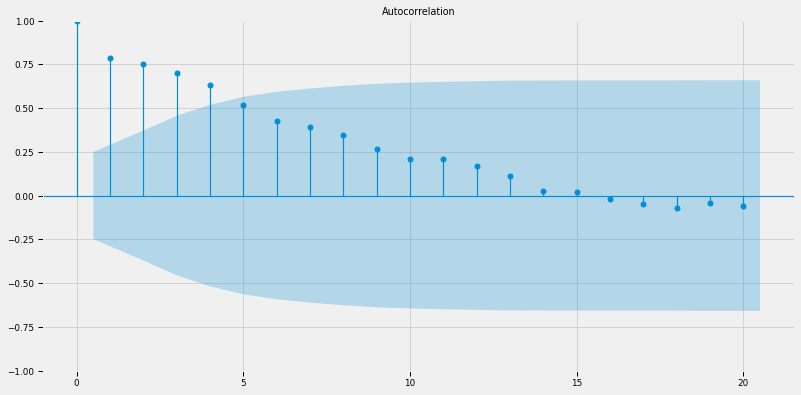

In [159]:
fig, ax = plt.subplots(figsize=(12, 6))
sm.graphics.tsa.plot_acf(irl_df1['Cereal production (metric tons)'], lags=20, ax=ax);
plt.show()

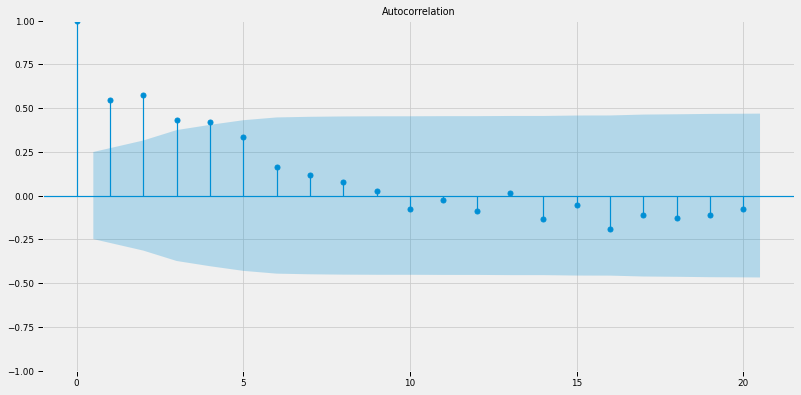

In [160]:
fig, ax = plt.subplots(figsize=(12, 6))
sm.graphics.tsa.plot_acf(port_df1['Cereal production (metric tons)'], lags=20, ax=ax);
plt.show()

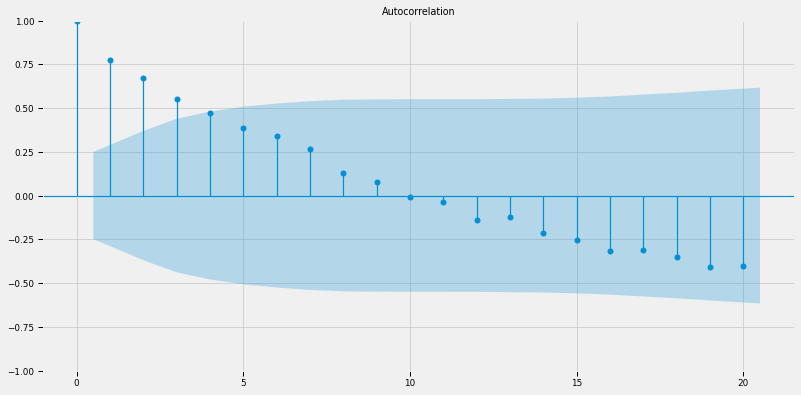

In [161]:
fig, ax = plt.subplots(figsize=(12, 6))
sm.graphics.tsa.plot_acf(euro_df1['Cereal production (metric tons)'], lags=20, ax=ax);
plt.show()

The goal is to determine whether the observed trend in the cereal production is increasing, decreasing, or constant. To this end, we use the Mann-Kendall Trend Test to determine whether or not a trend exists in time series data. It is a non-parametric test, implying that there is no underlying assumption made about the normality of the data (Shourov & Mahmud, 2019). However, it is important to check whether the data has autocorrelation in which case a modified Mann-Kendall Trend Test is used. The following hypothesis is tested at 0.05 level of confidence:

##### Test for trend

The hypotheses for the test are as follows:

H0 (null hypothesis): There is no trend present in the data.

HA (alternative hypothesis): A trend is present in the data. (This could be a positive or negative trend)


> From the two ACF plots shown above, it is noted that there is autocorrelation in the first lag. So, modified Mann Kendall test should be applied to test for trend

#### Cereal production in Portugal and Ireland, and the Rest of Europe

In [162]:
print (mk.hamed_rao_modification_test(irl_df1['Cereal production (metric tons)']))

Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='increasing', h=True, p=0.0006538263537567701, z=3.4082430267216464, Tau=0.5171866737176097, s=978.0, var_s=82172.7871711406, slope=17293.2, intercept=1432867.4)


In [163]:
print (mk.hamed_rao_modification_test(port_df1['Cereal production (metric tons)']))

Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='decreasing', h=True, p=0.0004761754096918036, z=-3.4938124513347453, Tau=-0.3870967741935484, s=-732.0, var_s=43775.94977483725, slope=-7997.047619047619, intercept=1653150.785714286)


In [164]:
print (mk.hamed_rao_modification_test(euro_df1['Cereal production (metric tons)']))

Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='no trend', h=False, p=0.2657054824763212, z=1.1130068618128655, Tau=0.19777895293495504, s=374.0, var_s=112310.91875347766, slope=32117.700151515164, intercept=10084028.299128786)


### Machine Learning

- Two approaches were adopted for the machine learning problem. In particular, clustering and prediction (using regression models) were used to learn patterns and make predictions on out-of sample data.

- All the models were implemented using cross-validation and following model optimization through hyper-parameter tuning


#### Get X and y variables

In [165]:
Y = irl_df1[['Cereal yield (kg per hectare)']].values
X = irl_df1.drop(['Cereal yield (kg per hectare)'],
                 axis = 1)

#### Clustering

In [166]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
#define hyperparamaters for k-means
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

##### Determine the optimum value of k using the elbow method

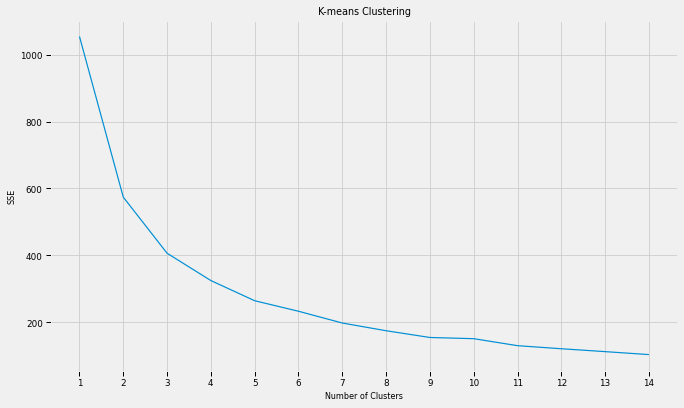

In [167]:
plt.rcParams['figure.figsize'] = 10,6
plt.plot(range(1, 15), sse)
plt.xticks(range(1, 15))
plt.title("K-means Clustering")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [168]:
kl = KneeLocator(range(1, 15), sse, curve="convex", direction="decreasing")
    
print("The optimum number of clusters (groups):",kl.elbow)

The optimum number of clusters (groups): 4


In [169]:
kmeans = KMeans(n_clusters=kl.elbow)
kmeans.fit(scaled_features)

KMeans(n_clusters=4)

In [170]:
# Calculate Silhoutte Score
#
score = silhouette_score(scaled_features, kmeans.labels_, metric='euclidean')
score

0.3345886883728004

##### DBSCAN

In [171]:
# cluster the data into five clusters
dbscan = DBSCAN(eps = 2).fit(scaled_features) # fitting the model
labels = dbscan.labels_ # getting the labels

In [172]:
# measure the performance of clustering algo
#Identifying which points make up our “core points”
core_samples = np.zeros_like(labels, dtype=bool)
core_samples[dbscan.core_sample_indices_] = True
#Calculating "the number of clusters"
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
#Computing "the Silhouette Score"is 
db = silhouette_score(X, labels)
print("Silhouette Coefficient: %0.3f"
      % db)

Silhouette Coefficient: -0.098


In [173]:
perf_clus = pd.DataFrame()
perf_clus['Model'] = ['K-means', 'DBSCAN']
perf_clus['Silhoutte score'] = [score, db]

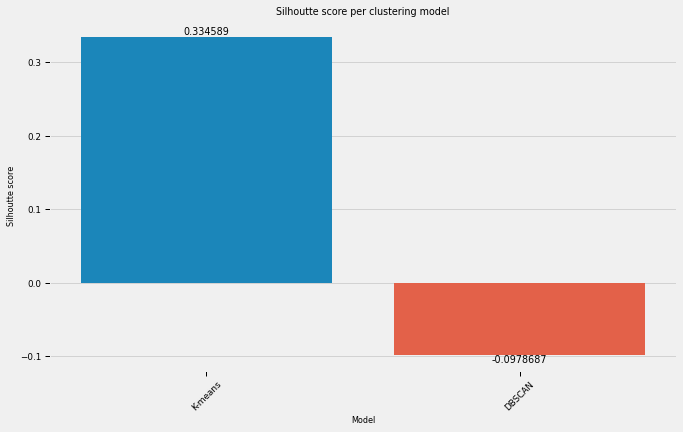

In [174]:
ax = sns.barplot(x='Model', y='Silhoutte score',
                data=perf_clus,
                 errwidth=0)
# labels and assign each bar to a different
# label.
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation = 45)
plt.title("Silhoutte score per clustering model")
plt.show()

##### Add the groups to the data and analyze the characteristics of each group

In [175]:
irl_df['Cluster Group'] = kmeans.predict(scaled_features)

In [176]:
round(irl_df.groupby(['Cluster Group'])[
                               'Cereal production (metric tons)', 'Food production index (2014-2016 = 100)'].mean(), 2)

,Cereal production (metric tons),Food production index (2014-2016 = 100)
Cluster Group,,
0,1330443.15,54.38
1,2217298.20,95.40
2,1911512.94,78.76
3,1923074.30,90.23


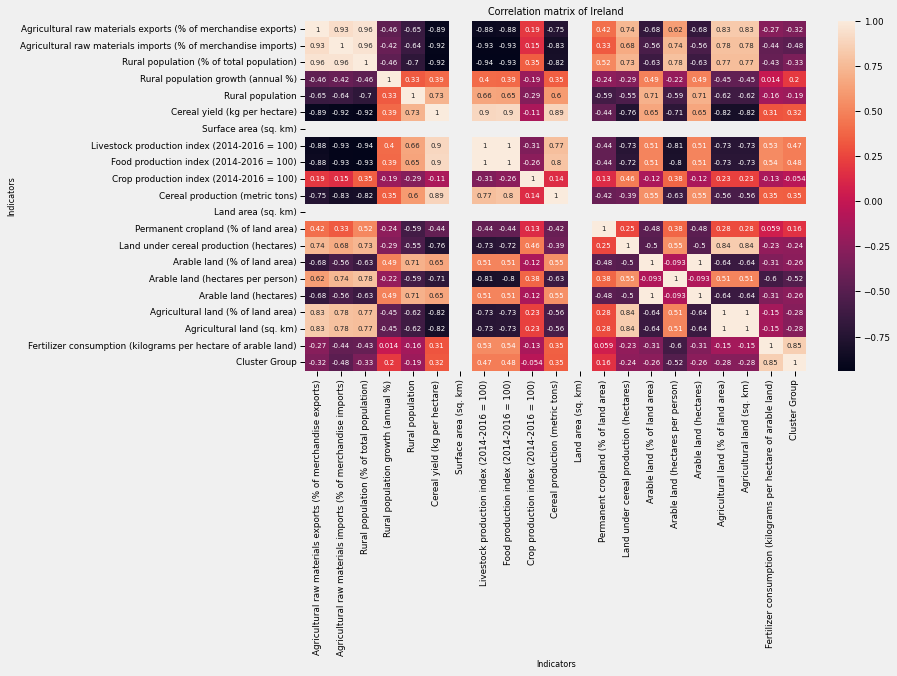

In [177]:
correlation = irl_df.corr ()  
heatmap = sns. heatmap(correlation, annot = True, annot_kws={'size': 7})  
heatmap.set (xlabel = 'Indicators',ylabel = 'Indicators', title = "Correlation matrix of Ireland")  
plt.show ()  

In [178]:
# find and remove correlated attributes
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_attributes = correlation(X, 0.8)
print('Correlated attributes: ', len(set(corr_attributes)) )
#drop correlated attributes
# removed correlated  attributes
X.drop(labels=corr_attributes, axis=1, inplace=True)

X.shape

Correlated attributes:  9


(62, 10)

In [179]:
X.columns

Index(['Agricultural raw materials exports (% of merchandise exports)',
       'Rural population growth (annual %)', 'Rural population',
       'Surface area (sq. km)', 'Crop production index (2014-2016 = 100)',
       'Land area (sq. km)', 'Permanent cropland (% of land area)',
       'Land under cereal production (hectares)',
       'Arable land (% of land area)',
       'Fertilizer consumption (kilograms per hectare of arable land)'],
      dtype='object')

#### Split data to test and train

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#### Decision Tree

In [181]:
#define the model
clf = DecisionTreeRegressor(random_state=123)
#
params =  {
    'min_samples_leaf': [1, 2, 3],
    'max_depth': [1, 2, 3]
}
#
# Create gridsearch instance
#
grid = GridSearchCV(estimator=clf,
                    param_grid=params,
                    cv=10,
                    n_jobs=1,
                    verbose=0)
#
# Fit the model
#
grid.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=123), n_jobs=1,
             param_grid={'max_depth': [1, 2, 3], 'min_samples_leaf': [1, 2, 3]})

In [182]:
#
# Assess the score
#
grid.best_score_, grid.best_params_

(0.6967424699739986, {'max_depth': 2, 'min_samples_leaf': 1})

##### Make predictions and Evaluate

In [183]:
preds_dt = grid.predict(X_test)
#Evaluate the performance of the model using R-squared and RMSE
rsq_dt = round(r2_score(y_test,preds_dt),4)
rmse_dt = round(mean_squared_error(y_test,preds_dt, squared = False),4)
print("Decision Tree R-Squared:",rsq_dt)

Decision Tree R-Squared: 0.8103


#### Linear Regression

In [184]:
#Fit a regression model
reg = LinearRegression().fit(X, Y)
reg.score(X, Y)

0.9194854373770734

In [185]:
reg.coef_

array([[-2.75150313e+02,  5.40247479e+01,  5.31149050e-03,
         1.26558142e-09,  5.19880298e+01,  2.27373675e-12,
        -2.84253623e+03, -1.31191715e-02,  5.42524334e+02,
         1.41087878e+00]])

In [186]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     49.86
Date:                Fri, 06 Jan 2023   Prob (F-statistic):           1.49e-16
Time:                        15:08:40   Log-Likelihood:                -322.94
No. Observations:                  43   AIC:                             663.9
Df Residuals:                      34   BIC:                             679.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [187]:
results_summary = est2.summary()

# Note that tables is a list. The table at index 1 is the "core" table. Additionally, read_html puts dfs in a list, so we want index 0
results_as_html = results_summary.tables[1].as_html()
results = pd.read_html(results_as_html, header=0, index_col=0)[0]
#get the significant variables at alpha = 0.05
signif = results[results['P>|t|']<0.05]
signif

,coef,std err,t,P>|t|,[0.025,0.975]
Rural population,0.0039,0.001,3.413,0.002,0.002,0.006
Crop production index (2014-2016 = 100),61.2655,10.979,5.580,0.000,38.953,83.578
Land under cereal production (hectares),-0.0158,0.002,-6.394,0.000,-0.021,-0.011
Arable land (% of land area),416.2468,203.623,2.044,0.049,2.436,830.058
Fertilizer consumption (kilograms per hectare of arable land),1.5700,0.252,6.218,0.000,1.057,2.083


In [188]:
X_reg = X_train[list(signif.index)]

X2 = sm.add_constant(X_reg)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     70.58
Date:                Fri, 06 Jan 2023   Prob (F-statistic):           6.87e-18
Time:                        15:08:41   Log-Likelihood:                -327.01
No. Observations:                  43   AIC:                             666.0
Df Residuals:                      37   BIC:                             676.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [189]:
results_summary = est2.summary()

# Note that tables is a list. The table at index 1 is the "core" table. Additionally, read_html puts dfs in a list, so we want index 0
results_as_html = results_summary.tables[1].as_html()
results = pd.read_html(results_as_html, header=0, index_col=0)[0]
#get the significant variables at alpha = 0.05
signif = results[results['P>|t|']<0.05]
signif.to_csv("Regression results.csv")
signif

,coef,std err,t,P>|t|,[0.025,0.975]
const,-9519.7776,2291.609,-4.154,0.0,-14200.000,-4876.536
Rural population,0.0050,0.001,4.763,0.0,0.003,0.007
Crop production index (2014-2016 = 100),62.0393,10.454,5.935,0.0,40.858,83.220
Land under cereal production (hectares),-0.0158,0.002,-7.130,0.0,-0.020,-0.011
Arable land (% of land area),719.0688,169.941,4.231,0.0,374.736,1063.401
Fertilizer consumption (kilograms per hectare of arable land),1.8189,0.234,7.770,0.0,1.345,2.293


In [190]:
preds_lr = reg.predict(X_test)
#Evaluate the performance of the model using R-squared and RMSE
rsq_lr = round(r2_score(y_test,preds_lr),4)
rmse_lr = round(mean_squared_error(y_test,preds_lr, squared = False),4)
print("Linear Regression Tree R-Squared:",rsq_lr)

Linear Regression Tree R-Squared: 0.9406


In [191]:
regr = LinearRegression()
regr.fit(X_reg, y_train)

LinearRegression()

In [192]:
random_grid = {'normalize': [True, False],
              'fit_intercept':[True, False],
              'n_jobs': [10,20,100,150,200,500]}


regr_random = RandomizedSearchCV(estimator = regr,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=0, random_state=35, n_jobs = -1)
#Train the model
regr_random.fit(X_reg, y_train)

RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'fit_intercept': [True, False],
                                        'n_jobs': [10, 20, 100, 150, 200, 500],
                                        'normalize': [True, False]},
                   random_state=35)

In [193]:
# print the best parameters
print ('Best Parameters: ', regr_random.best_params_, ' \n')

Best Parameters:  {'normalize': True, 'n_jobs': 10, 'fit_intercept': True}  



In [194]:
#Subset the data to obtain the variables that were noted to be significant

preds_regr = regr_random.predict(X_test[list(X_reg.columns)])
#Evaluate the peregrormance of the model using R-squared and RMSE
rsq_regr = round(r2_score(y_test,preds_regr),4)
rmse_regr = round(mean_squared_error(y_test,preds_regr, squared = False),4)
print("Linear Regression R-Squared:",rsq_regr)

Linear Regression R-Squared: 0.8961


#### Random Forest

In [195]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node


random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,
}

In [196]:
%%time

rf = RandomForestRegressor(random_state=42)

rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=0, random_state=42, n_jobs = -1)
#Train the model
rf_random.fit(X_train, y_train)

CPU times: total: 1.2 s
Wall time: 21.3 s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=42)

In [197]:
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Best Parameters:  {'n_estimators': 5, 'min_samples_split': 2, 'max_features': 'auto', 'max_depth': 100}  



In [198]:
preds_rf = rf_random.predict(X_test)
#Evaluate the performance of the model using R-squared and RMSE
rsq_rf = round(r2_score(y_test,preds_rf),4)
rmse_rf = round(mean_squared_error(y_test,preds_rf, squared = False),4)
print("Random Forest R-Squared:",rsq_rf)

Random Forest R-Squared: 0.8955


##### Compare Model Performance

In [199]:
perf = pd.DataFrame()
perf['Model'] = ['Decision Tree', 'Random Forest', 'Linear Regression (Complete dataframe)', 'Regression (Significant variables)']
perf['R-Squared'] = rsq_dt, rsq_rf, rsq_lr, rsq_regr
perf['RMSE'] = rmse_dt, rmse_rf, rmse_lr, rmse_regr
perf.sort_values('RMSE', ascending = False)

,Model,R-Squared,RMSE
0,Decision Tree,0.8103,836.0710
1,Random Forest,0.8955,620.5166
3,Regression (Significant variables),0.8961,618.7358
2,Linear Regression (Complete dataframe),0.9406,467.6620


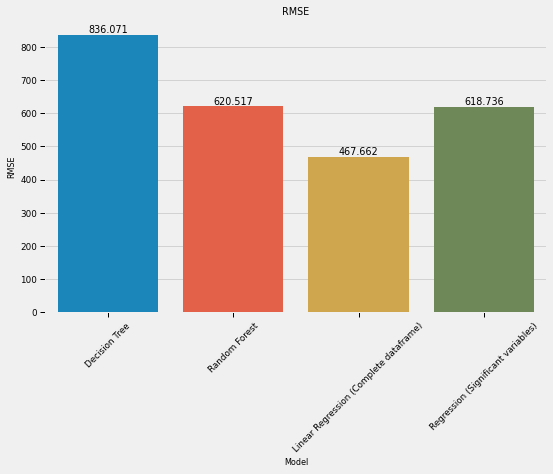

In [200]:
plt.rcParams['figure.figsize'] = 8,5
ax = sns.barplot(x='Model', y='RMSE',
                data=perf,
                 errwidth=0)
# labels and assign each bar to a different
# label.
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation = 45)
plt.title("RMSE")
plt.show()

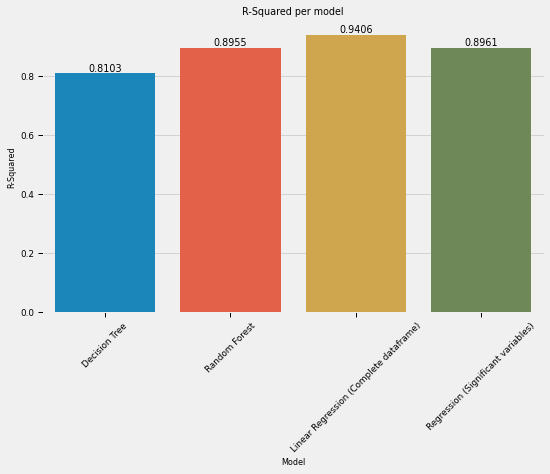

In [201]:
ax = sns.barplot(x='Model', y='R-Squared',
                data=perf,
                 errwidth=0)
# labels and assign each bar to a different
# label.
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation = 45)
plt.title("R-Squared per model")
plt.show()

#### Make Predictions and save results to a csv file

In [202]:
#Add clusters to the test data
kmeans = KMeans(n_clusters=kl.elbow)
copy_irl = irl_df1.copy()
datax = copy_irl[X.columns].fillna(copy_irl[X.columns].mean())
scaled_features = scaler.fit_transform(datax)
kmeans.fit(scaled_features)
datax['Cluster'] = kmeans.predict(scaled_features)
datax['Cereal yield (kg per hectare)'] = copy_irl['Cereal yield (kg per hectare)'].fillna(copy_irl['Cereal yield (kg per hectare)'].mean())
df = datax.copy()
df['Cereal yield (kg per hectare)'] = datax['Cereal yield (kg per hectare)']
df['Predicted Cereal Yields'] = reg.predict(datax.drop(['Cluster', 'Cereal yield (kg per hectare)'], axis = 1))
df['Year'] = list(copy_irl.index)
df = df.rename_axis(None, axis=1)
df = df.reset_index(drop = True)

df.to_csv("data_processed.csv", index = False)

##### Save the processed dataframes used for analysis

In [203]:
#combine the dataframes
irl_df1['Country'] = 'Ireland'
port_df1['Country'] = 'Portugal'
euro_df1['Country'] = 'Rest of Europe'
datax = irl_df1.copy()
datax = datax.append(port_df1).append(euro_df1)
datax = datax[['Rural population (% of total population)',
       'Rural population growth (annual %)', 'Rural population',
       'Cereal yield (kg per hectare)', 'Surface area (sq. km)',
       'Livestock production index (2014-2016 = 100)',
       'Food production index (2014-2016 = 100)',
       'Crop production index (2014-2016 = 100)',
       'Cereal production (metric tons)', 'Land area (sq. km)', 'Country']]
datax.to_csv("Analysis data.csv", index = False)

### Sentiment Analysis

#### Import cereals reviews data

In [204]:
revs = pd.read_csv('data/reviews.csv')
#Drop rows with names and empty entries
revs['Length'] = [len(str(item)) for item in revs.Comments]
revs = revs[revs['Length'] >38][['Comments']]
revs.head()

,Comments
0,"*By ‘Irish breakfast cereals’, we mean the one..."
1,Dusty matchsticks. That’s what All Bran is.
3,Tastes like steel wool. And you shouldn’t need...
5,You can now buy these for approximately €427 i...
8,"A satisfactory alternative to muesli, and than..."


In [205]:
#### Clean the comments to remove punctuations

comments = [item.translate(str.maketrans('', '', string.punctuation)) for item in revs['Comments']]

In [206]:
all_stopwords = stopwords.words('english')
all_stopwords.append("A")
all_stopwords.append("We")
all_stopwords.append("By")
all_stopwords.append("You")

words = [word for line in comments for word in line.split()]
filtered_words = [word for word in words if word not in all_stopwords]
freqs = Counter(filtered_words).most_common(10)
freqs

[('people', 5),
 ('number', 5),
 ('Ireland', 4),
 ('milk', 4),
 ('sugar', 4),
 ('breakfast', 3),
 ('mean', 3),
 ('want', 3),
 ('enough', 3),
 ('love', 3)]

In [207]:
wordds = pd.DataFrame(freqs)
wordds.columns = ['Word', 'Frequency']
wordds

,Word,Frequency
0,people,5
1,number,5
2,Ireland,4
3,milk,4
4,sugar,4
5,breakfast,3
6,mean,3
7,want,3
8,enough,3
9,love,3


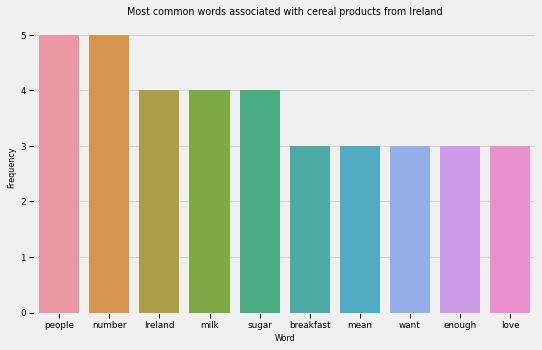

In [208]:
sns.barplot( x= 'Word', y='Frequency', data = wordds)
plt.title("Most common words associated with cereal products from Ireland")
plt.show()

In [209]:
# function to compute sentiments from polarity of the sentence.
def sentiment_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
 
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        sent = 'Positive'
 
    elif sentiment_dict['compound'] <= - 0.05 :
         sent = 'Negative'
 
    else :
        sent = 'Neutral'
    return sent

In [210]:
sentiments = [sentiment_scores(sentence) for sentence in comments]

revs['Sentiment'] = sentiments
vals = revs['Sentiment'].value_counts()
vals

Positive    19
Negative     9
Neutral      8
Name: Sentiment, dtype: int64

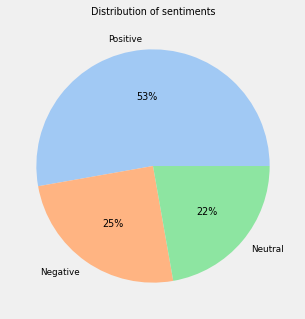

In [211]:
datax = list(vals.values)
labels = list(vals.index)

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(datax, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Distribution of sentiments")
plt.show()